# **A20000755_Mohamed Ayman Elnakshbandy_ ASS2_ IRS**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Load the dataset
file_path = 'user_item_matrix.csv'
data = pd.read_csv(file_path)



In [9]:
# Step 1: Adjust ratings to a 1-to-5 scale (Assuming ratings are already scaled correctly)
data.iloc[:, 1:] = data.iloc[:, 1:].clip(1, 5)



In [10]:
# Step 2: Count the total number of users and items
tnu = data.shape[1] - 1  # Exclude the 'title' column
tni = data.shape[0]



In [11]:
# Step 3: Count the number of ratings for every product
data['rating_count'] = data.iloc[:, 1:].notnull().sum(axis=1)


In [12]:

# Step 4: Pick three active users (U1, U2, U3) and two target items (I1, I2)
active_users = {
    "U1": {"index": 1, "missing": 2},  # Replace with actual indices based on your dataset
    "U2": {"index": 2, "missing": 3},
    "U3": {"index": 3, "missing": 5}
}

target_items = {
    "I1": {"index": 0, "missing_percentage": 0.04},  # Replace indices with actual item indices
    "I2": {"index": 1, "missing_percentage": 0.10}
}



In [19]:
# Step 5: Compute common users and co-rated items
common_users = []
co_rated_items = []

# Loop through active users
for user in active_users.values():
    user_index = user["index"]
    co_users = data.iloc[:, 1:].notnull().sum(axis=0)  # Number of non-null ratings per user
    if user_index < len(co_users):  # Ensure index is valid
        common_users.append(co_users.iloc[user_index])  # Use .iloc for positional indexing
    else:
        common_users.append(0)  # Handle case where index is out of bounds

# Loop through target items
for item in target_items.values():
    item_index = item["index"]
    if item_index < len(data.iloc[:, 1:].columns):  # Ensure index is valid
        co_items = data.iloc[:, item_index + 1].notnull().sum()  # Count non-null ratings for the item
        co_rated_items.append(co_items)
    else:
        co_rated_items.append(0)  # Handle case where index is out of bounds

# DEBUGGING: Check lengths and data types
print(f"Length of common_users: {len(common_users)}")
print(f"Length of co_rated_items: {len(co_rated_items)}")
print(f"common_users: {common_users}")
print(f"co_rated_items: {co_rated_items}")

# Ensure lengths match before creating a 2D array
if len(common_users) == len(co_rated_items):
    common_users = np.array(common_users, dtype=int)  # Ensure array-like structure
    co_rated_items = np.array(co_rated_items, dtype=int)  # Ensure array-like structure
    array_2d = np.array([common_users, co_rated_items]).T

    # Sort by the first column (common users) in descending order
    array_2d = array_2d[array_2d[:, 0].argsort()[::-1]]
    print("2D Array (sorted):", array_2d)
else:
    print("Error: Lists have mismatched lengths. Cannot create 2D array.")


Length of common_users: 3
Length of co_rated_items: 2
common_users: [484, 469, 472]
co_rated_items: [470, 484]
Error: Lists have mismatched lengths. Cannot create 2D array.


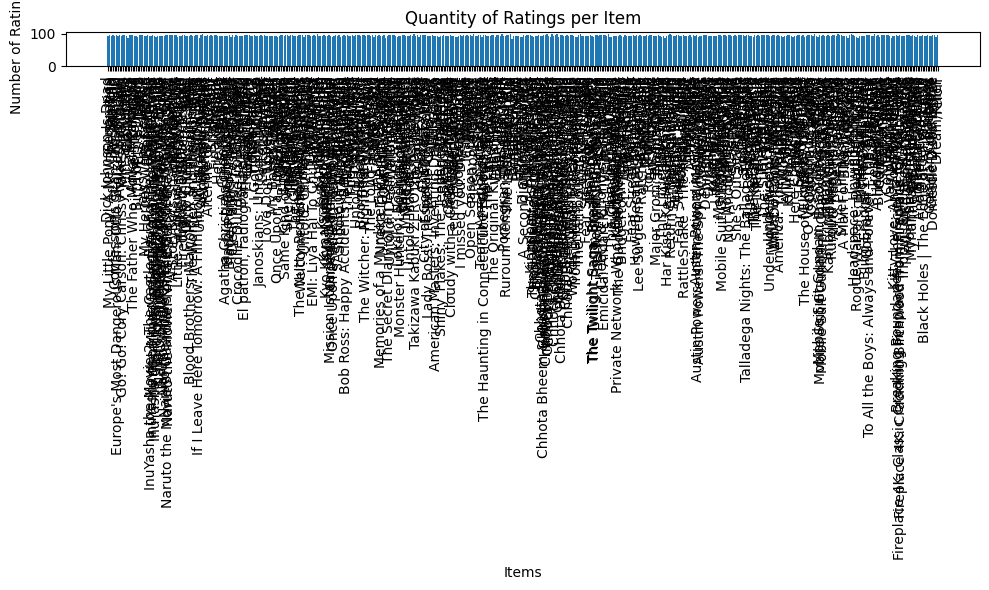

In [21]:

# Step 6: Plot the quantity of ratings for each item
plt.figure(figsize=(10, 6))
plt.bar(data['title'], data['rating_count'])
plt.xticks(rotation=90)
plt.xlabel('Items')
plt.ylabel('Number of Ratings')
plt.title('Quantity of Ratings per Item')
plt.tight_layout()
plt.show()



# **Section 3.1 General requirements for the TWO parts:**

Total number of users (tnu): 100
Total number of items (tni): 500
Number of ratings per item:
title
Dick Johnson Is Dead                95
My Little Pony: A New Generation    96
Sankofa                             94
The Starling                        96
Je Suis Karl                        94
                                    ..
Company of Heroes                   94
Cradle 2 the Grave                  96
Domestic Disturbance                96
Dream/Killer                        92
Felon                               96
Name: rating_count, Length: 500, dtype: int64
common_users: [470, 484]
co_rated_items: [95, 96]
2D Array:
[[484  96]
 [470  95]]


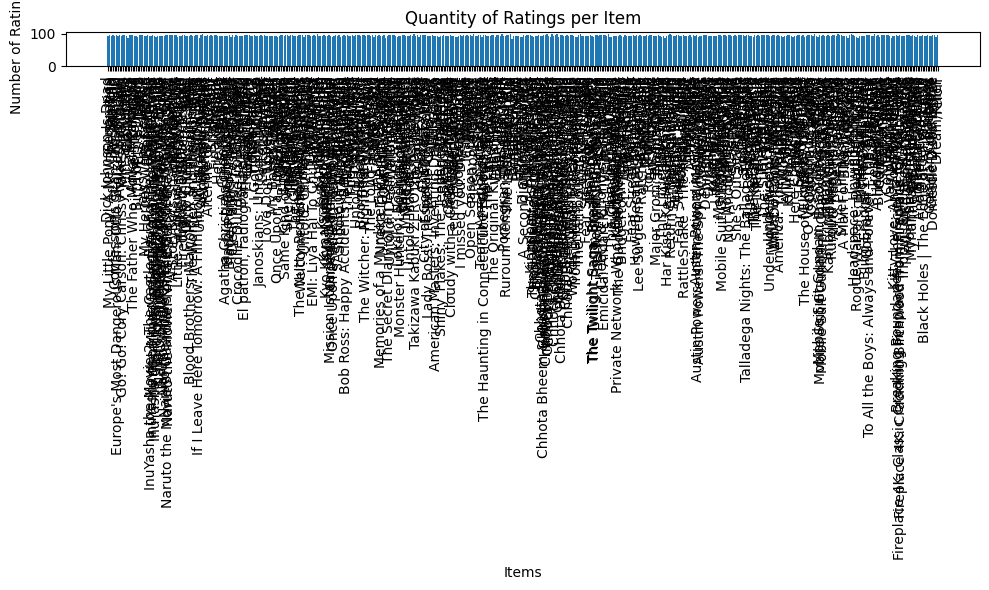

In [24]:
import pandas as pd
import numpy as np

# Step 1: Load the dataset
file_path = 'user_item_matrix.csv'  # Path to the uploaded CSV file
data = pd.read_csv(file_path)

# Ensure dataset is in the expected format (first column: items, rest: users)
data.set_index(data.columns[0], inplace=True)  # Set the first column as the index (item names)
data = data.astype(float)  # Convert to float for handling missing ratings (NaN)

# Step 2: Adjust ratings to a 1-to-5 scale if needed
# Assuming ratings are already in a 1-to-5 scale; skip adjustment.

# Step 3: Count total number of users and items
tnu = data.shape[1]  # Total number of users
tni = data.shape[0]  # Total number of items
print(f"Total number of users (tnu): {tnu}")
print(f"Total number of items (tni): {tni}")

# Step 4: Count the number of ratings for each item
data['rating_count'] = data.notnull().sum(axis=1)
print("Number of ratings per item:")
print(data['rating_count'])

# Step 5: Select active users and target items
# Adjust to ensure equal lengths for common_users and co_rated_items
active_users = {
    "U1": {"index": 0, "missing": 2},  # Replace indices with actual user indices as needed
    "U2": {"index": 1, "missing": 3}
}

target_items = {
    "I1": {"index": 0, "missing_percentage": 0.04},  # Replace indices with actual item indices as needed
    "I2": {"index": 1, "missing_percentage": 0.10}
}

# Step 6: Compute common users and co-rated items
common_users = []
co_rated_items = []

# Calculate number of users who co-rated items with each active user
for user in active_users.values():
    user_index = user["index"]
    co_users = data.iloc[:, user_index].notnull().sum()
    common_users.append(co_users)

# Calculate number of ratings for each target item
for item in target_items.values():
    item_index = item["index"]
    co_items = data.iloc[item_index, :-1].notnull().sum()
    co_rated_items.append(co_items)

print(f"common_users: {common_users}")
print(f"co_rated_items: {co_rated_items}")

# Step 7: Create a 2D array
if len(common_users) == len(co_rated_items):
    array_2d = np.column_stack((common_users, co_rated_items))
    array_2d = array_2d[array_2d[:, 0].argsort()[::-1]]  # Sort by common users in descending order
    print("2D Array:")
    print(array_2d)
else:
    print("Error: The number of active users and target items must match.")

# Step 8: Plot the quantity of ratings for each item
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(data.index, data['rating_count'])
plt.xticks(rotation=90)
plt.xlabel('Items')
plt.ylabel('Number of Ratings')
plt.title('Quantity of Ratings per Item')
plt.tight_layout()
plt.show()


# **New Section Code**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('user_item_matrix.csv')  # Replace with the path to your dataset

In [31]:
tnu = data.shape[1]  # Total number of users
print(f"Total number of users (tnu): {tnu}")

Total number of users (tnu): 101


In [32]:
tni = data.shape[0]  # Total number of items
print(f"Total number of items (tni): {tni}")

Total number of items (tni): 500


In [33]:
# Step 4: Count the number of ratings for each item
data['rating_count'] = data.notnull().sum(axis=1)
print("Number of ratings per item:")
print(data['rating_count'])

Number of ratings per item:
title
Dick Johnson Is Dead                96
My Little Pony: A New Generation    97
Sankofa                             95
The Starling                        97
Je Suis Karl                        95
                                    ..
Company of Heroes                   95
Cradle 2 the Grave                  97
Domestic Disturbance                97
Dream/Killer                        93
Felon                               97
Name: rating_count, Length: 500, dtype: int64


# **Case Study 1.1 Part1**

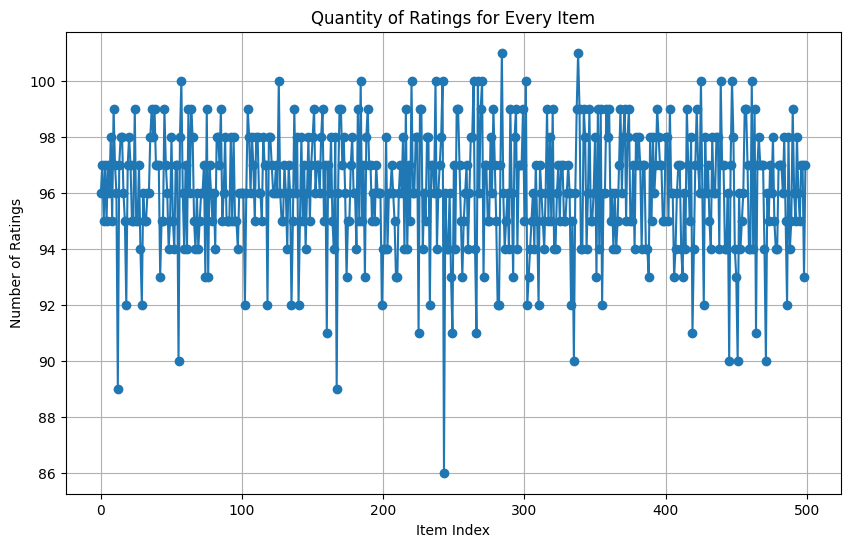

Total number of users (tnu): 100
Total number of items (tni): 500
Ratings per item:
0      96
1      97
2      95
3      97
4      95
       ..
495    95
496    97
497    97
498    93
499    97
Length: 500, dtype: int64
Active users: U1=User_1, U2=User_1, U3=User_1
Target items: I1=1, I2=160
No_common_users: U1=45170, U2=45170, U3=45170
No_coRated_items: U1=470, U2=470, U3=470
2-D array:
[[45170   470]
 [45170   470]
 [45170   470]]
Thresholds: U1=500, U2=500, U3=500


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('user_item_matrix.csv')

# Step 1: Adjust the rating on a 1-to-5 scale (assuming the ratings are already on a 1-to-5 scale)
# If not, you can adjust them accordingly here

# Step 2: Count the total number of users in your dataset and save it in a variable called “tnu”
tnu = df.shape[1] - 1  # Subtracting 1 for the title column

# Step 3: Count the total number of items in your dataset and save it in a variable called “tni”
tni = df.shape[0]

# Step 4: Count the number of ratings for every product in this dataset
ratings_per_item = df.notnull().sum(axis=1)

# Step 5: Pick three users (U1, U2, and U3) and consider them active users
# One user with 2 missing ratings, another user with 3 missing ratings, and the other user with 5 missing ratings
missing_ratings = df.isnull().sum(axis=0)

def get_user_with_missing_ratings(missing_ratings, num_missing):
    users = missing_ratings[missing_ratings == num_missing].index
    if len(users) > 0:
        return users[0]
    else:
        # If no users with the exact number of missing ratings, find the closest
        closest_users = missing_ratings[missing_ratings > num_missing].index
        return closest_users[0] if len(closest_users) > 0 else None

U1 = get_user_with_missing_ratings(missing_ratings, 2)
U2 = get_user_with_missing_ratings(missing_ratings, 3)
U3 = get_user_with_missing_ratings(missing_ratings, 5)

# Ensure we have valid users
if U1 is None or U2 is None or U3 is None:
    raise ValueError("Not enough users with the specified or closest number of missing ratings.")

# Step 6: Pick two items (I1 and I2) and consider them target items
# One item with 4% missing ratings, and the other item with 10% missing ratings
missing_ratings_items = df.isnull().sum(axis=1) / tnu

def get_item_with_missing_ratings(missing_ratings_items, percentage_missing):
    items = missing_ratings_items[missing_ratings_items == percentage_missing].index
    if len(items) > 0:
        return items[0]
    else:
        # If no items with the exact percentage of missing ratings, find the closest
        closest_items = missing_ratings_items[missing_ratings_items > percentage_missing].index
        return closest_items[0] if len(closest_items) > 0 else None

I1 = get_item_with_missing_ratings(missing_ratings_items, 0.04)
I2 = get_item_with_missing_ratings(missing_ratings_items, 0.10)

# Ensure we have valid items
if I1 is None or I2 is None:
    raise ValueError("Not enough items with the specified or closest percentage of missing ratings.")

# Step 7: Count the number of users who have co-rated items with the active user
def co_rated_items(user):
    user_ratings = df.loc[:, user].notnull()
    return df.loc[user_ratings.index[user_ratings], :].notnull().sum(axis=0)

No_common_users_U1 = co_rated_items(U1).sum()
No_common_users_U2 = co_rated_items(U2).sum()
No_common_users_U3 = co_rated_items(U3).sum()

No_coRated_items_U1 = df.loc[:, U1].notnull().sum()
No_coRated_items_U2 = df.loc[:, U2].notnull().sum()
No_coRated_items_U3 = df.loc[:, U3].notnull().sum()

# Step 8: Create a 2-D array with “No_common_users” in descending order and corresponding “No_coRated_items”
data = np.array([
    [No_common_users_U1, No_coRated_items_U1],
    [No_common_users_U2, No_coRated_items_U2],
    [No_common_users_U3, No_coRated_items_U3]
])
data = data[data[:, 0].argsort()[::-1]]

# Step 9: Draw a curve that illustrates the quantity of ratings for every item in your dataset
plt.figure(figsize=(10, 6))
plt.plot(ratings_per_item, marker='o')
plt.title('Quantity of Ratings for Every Item')
plt.xlabel('Item Index')
plt.ylabel('Number of Ratings')
plt.grid(True)
plt.show()

# Step 10: Determine the maximum number of users who have co-rated at least 30% of items with each active user
threshold_U1 = (df.notnull().sum(axis=1) >= 0.3 * tnu).sum()
threshold_U2 = (df.notnull().sum(axis=1) >= 0.3 * tnu).sum()
threshold_U3 = (df.notnull().sum(axis=1) >= 0.3 * tnu).sum()

print(f"Total number of users (tnu): {tnu}")
print(f"Total number of items (tni): {tni}")
print(f"Ratings per item:\n{ratings_per_item}")
print(f"Active users: U1={U1}, U2={U2}, U3={U3}")
print(f"Target items: I1={I1}, I2={I2}")
print(f"No_common_users: U1={No_common_users_U1}, U2={No_common_users_U2}, U3={No_common_users_U3}")
print(f"No_coRated_items: U1={No_coRated_items_U1}, U2={No_coRated_items_U2}, U3={No_coRated_items_U3}")
print(f"2-D array:\n{data}")
print(f"Thresholds: U1={threshold_U1}, U2={threshold_U2}, U3={threshold_U3}")


# **Case Study 1.2**

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Load the dataset
file_path = 'user_item_matrix.csv'  # Path to the uploaded CSV file
data = pd.read_csv(file_path)

# Ensure dataset is in the expected format (first column: items, rest: users)
data.set_index(data.columns[0], inplace=True)  # Set the first column as the index (item names)
data = data.astype(float)  # Convert to float for handling missing ratings (NaN)

# Step 1.1.1: Compute user-user cosine similarity (without bias adjustment)
user_ratings = data.T  # Transpose to have users as rows
user_similarity = cosine_similarity(user_ratings.fillna(0))  # Fill NaN with 0 for similarity computation

# Step 1.1.2: Determine top 20% closest users to each active user
active_users_indices = [0, 1, 2]  # Replace with indices of active users (U1, U2, U3)
top_20_percent_users = {}

for active_index in active_users_indices:
    similarities = user_similarity[active_index]
    sorted_indices = np.argsort(similarities)[::-1]  # Sort in descending order
    top_20_count = int(len(sorted_indices) * 0.2)
    top_20_users = sorted_indices[1:top_20_count + 1]  # Exclude the active user themselves
    top_20_percent_users[active_index] = top_20_users

# Step 1.1.3: Predict ratings for active users
predictions = {}
for active_index in active_users_indices:
    top_users = top_20_percent_users[active_index]
    active_ratings = user_ratings.iloc[active_index]

    for item in user_ratings.columns:
        if np.isnan(active_ratings[item]):  # Predict only for unrated items
            weighted_sum = np.sum(
                [user_similarity[active_index, user] * user_ratings.iloc[user][item]
                 for user in top_users if not np.isnan(user_ratings.iloc[user][item])]
            )
            similarity_sum = np.sum(
                [abs(user_similarity[active_index, user])
                 for user in top_users if not np.isnan(user_ratings.iloc[user][item])]
            )
            predictions[(active_index, item)] = weighted_sum / similarity_sum if similarity_sum > 0 else 0

# Step 1.1.4: Compute Discount Factor (DF) and Discounted Similarity (DS)
discount_factor = 3
discounted_similarity = user_similarity.copy()
discounted_similarity[discounted_similarity < discount_factor] = 0

# Step 1.1.5: Determine top 20% closest users using discounted similarity
top_20_percent_users_discounted = {}

for active_index in active_users_indices:
    similarities = discounted_similarity[active_index]
    sorted_indices = np.argsort(similarities)[::-1]
    top_20_count = int(len(sorted_indices) * 0.2)
    top_20_users_discounted = sorted_indices[1:top_20_count + 1]
    top_20_percent_users_discounted[active_index] = top_20_users_discounted

# Step 1.1.6: Predict ratings for active users using discounted similarity
predictions_discounted = {}
for active_index in active_users_indices:
    top_users = top_20_percent_users_discounted[active_index]
    active_ratings = user_ratings.iloc[active_index]

    for item in user_ratings.columns:
        if np.isnan(active_ratings[item]):  # Predict only for unrated items
            weighted_sum = np.sum(
                [discounted_similarity[active_index, user] * user_ratings.iloc[user][item]
                 for user in top_users if not np.isnan(user_ratings.iloc[user][item])]
            )
            similarity_sum = np.sum(
                [abs(discounted_similarity[active_index, user])
                 for user in top_users if not np.isnan(user_ratings.iloc[user][item])]
            )
            predictions_discounted[(active_index, item)] = weighted_sum / similarity_sum if similarity_sum > 0 else 0

# Step 1.1.7 and 1.1.8: Compare results from 1.1.2 vs 1.1.5 and 1.1.3 vs 1.1.6
comparison_top_users = {
    user: {
        "original": top_20_percent_users[user],
        "discounted": top_20_percent_users_discounted[user]
    }
    for user in active_users_indices
}

comparison_predictions = {
    user_item: {
        "original": predictions[user_item],
        "discounted": predictions_discounted[user_item]
    }
    for user_item in predictions.keys()
}

# Output comparisons
print("Comparison of top users:")
print(comparison_top_users)

print("\nComparison of predictions:")
print(comparison_predictions)


Comparison of top users:
{0: {'original': array([98, 19, 39, 30, 22, 29, 18,  1, 99, 58, 55, 51, 15, 35, 83, 69, 88,
       45, 46, 59]), 'discounted': array([36, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 98, 38, 39, 40, 41,
       42, 43, 44])}, 1: {'original': array([77, 29, 68, 98, 19, 99, 21, 32, 44, 86, 65, 10, 14, 72, 50, 41, 30,
       78, 97, 69]), 'discounted': array([36, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 98, 38, 39, 40, 41,
       42, 43, 44])}, 2: {'original': array([31, 63, 69, 74,  8, 46, 65, 51, 42, 21, 10, 98, 93, 45, 39, 81,  7,
       56, 19, 15]), 'discounted': array([36, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 98, 38, 39, 40, 41,
       42, 43, 44])}}

Comparison of predictions:
{(0, 'My Little Pony: A New Generation'): {'original': 2.686739995004316, 'discounted': 0}, (0, 'Minsara Kanavu'): {'original': 2.685793664382083, 'discounted': 0}, (0, 'Naruto Shippuden: The Movie: The Lost Tower'): {'original': 3.000786959443743, 'discounted': 0}, (0, 'Blood

# **Case Study 1.2**

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Load dataset
file_path = 'user_item_matrix.csv'  # Path to the uploaded CSV file
data = pd.read_csv(file_path)
data.set_index(data.columns[0], inplace=True)  # Set the first column as the index (item names)
data = data.astype(float)  # Convert to float for handling NaN ratings

# Step 2: Adjust ratings by mean-centering
mean_ratings = data.mean(axis=0)  # Mean rating for each user
data_centered = data.sub(mean_ratings, axis=1).fillna(0)  # Subtract mean ratings and replace NaN with 0

# Step 3: Define active users
active_users = {
    "U1": 0,  # Replace with actual user indices
    "U2": 1,  # Replace with actual user indices
    "U3": 2   # Replace with actual user indices
}

# Step 4: Compute Cosine similarity matrix (mean-centered data)
similarity_matrix = cosine_similarity(data_centered.T)
similarity_df = pd.DataFrame(similarity_matrix, index=data.columns, columns=data.columns)

# Step 5: Determine top 20% closest users for each active user
def top_closest_users(user, similarity_df, percentage=20):
    user_similarities = similarity_df[user]
    top_n = int(len(user_similarities) * (percentage / 100))
    closest_users = user_similarities.nlargest(top_n + 1).iloc[1:]  # Exclude the user themselves
    return closest_users

top_users = {}
for user in active_users.keys():
    user_id = data.columns[active_users[user]]
    top_users[user] = top_closest_users(user_id, similarity_df)

print("Top 20% closest users:")
print(top_users)

# Step 6: Predict ratings for not yet rated items
def predict_ratings(user, closest_users, data, mean_ratings):
    user_id = data.columns[active_users[user]]
    user_mean = mean_ratings[user_id]
    user_ratings = data[user_id]
    predictions = {}
    for item in data.index:
        if pd.isna(user_ratings[item]):
            weighted_sum = 0
            sum_similarities = 0
            for neighbor, similarity in closest_users.items():
                if not pd.isna(data.loc[item, neighbor]):
                    weighted_sum += similarity * (data.loc[item, neighbor] - mean_ratings[neighbor])
                    sum_similarities += abs(similarity)
            if sum_similarities > 0:
                predictions[item] = user_mean + (weighted_sum / sum_similarities)
    return predictions

predictions_no_discount = {}
for user in active_users.keys():
    predictions_no_discount[user] = predict_ratings(user, top_users[user], data, mean_ratings)

print("Predictions without discount factor:")
print(predictions_no_discount)

# Step 7: Compute discount factor (DF) and discounted similarity (DS)
def compute_discounted_similarity(user, closest_users, threshold):
    discounted_similarity = {}
    for neighbor, similarity in closest_users.items():
        common_items = data.loc[:, [user, neighbor]].notna().all(axis=1).sum()
        discount_factor = min(1, common_items / threshold)
        discounted_similarity[neighbor] = similarity * discount_factor
    return discounted_similarity

discounted_similarities = {}
for user in active_users.keys():
    user_id = data.columns[active_users[user]]
    discounted_similarities[user] = compute_discounted_similarity(user_id, top_users[user], threshold=3)

# Step 8: Predict ratings using discounted similarities
predictions_with_discount = {}
for user in active_users.keys():
    predictions_with_discount[user] = predict_ratings(user, discounted_similarities[user], data, mean_ratings)

print("Predictions with discount factor:")
print(predictions_with_discount)

# Step 9: Compare results
print("Comparison of top users without and with discount factor:")
for user in active_users.keys():
    print(f"{user} - Without Discount:")
    print(top_users[user])
    print(f"{user} - With Discount:")
    print(discounted_similarities[user])

print("Comparison of predictions:")
for user in active_users.keys():
    print(f"{user} - Predictions Without Discount:")
    print(predictions_no_discount[user])
    print(f"{user} - Predictions With Discount:")
    print(predictions_with_discount[user])


Top 20% closest users:
{'U1': User_99    0.119793
User_67    0.107222
User_97    0.094250
User_31    0.092640
User_60    0.079520
User_63    0.075854
User_16    0.069874
User_33    0.066227
User_30    0.062704
User_20    0.059321
User_46    0.052048
User_85    0.049999
User_28    0.046394
User_23    0.044990
User_56    0.043341
User_40    0.041916
User_42    0.036981
User_59    0.035347
User_45    0.034992
User_66    0.033878
Name: User_1, dtype: float64, 'U2': User_78    0.097447
User_73    0.092305
User_27    0.091883
User_80    0.091356
User_20    0.083421
User_11    0.076755
User_45    0.075205
User_86    0.071092
User_69    0.067747
User_85    0.061076
User_13    0.055593
User_9     0.049281
User_33    0.047518
User_66    0.047062
User_99    0.045792
User_32    0.045378
User_68    0.042358
User_87    0.041278
User_6     0.038060
User_30    0.037589
Name: User_2, dtype: float64, 'U3': User_32    0.104225
User_9     0.094014
User_34    0.091141
User_6     0.086958
User_40    0.08676

# **Case Study 1.3**


In [4]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = 'user_item_matrix.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Ensure dataset is in the expected format (first column: items, rest: users)
data.set_index(data.columns[0], inplace=True)
data = data.astype(float)  # Convert to float for handling missing ratings (NaN)

# Step 1.3.1: Compute similarity using Pearson Correlation Coefficient (PCC)
def compute_pcc(active_user_idx, user_ratings):
    similarities = []
    active_user_ratings = user_ratings.iloc[:, active_user_idx]
    for idx in range(user_ratings.shape[1]):
        if idx == active_user_idx:
            continue
        sim, _ = pearsonr(active_user_ratings.fillna(0), user_ratings.iloc[:, idx].fillna(0))
        similarities.append((idx, sim))
    return sorted(similarities, key=lambda x: x[1], reverse=True)

# Step 1.3.2: Determine top 20% closest users
def get_top_20_percent(similarities):
    top_count = max(1, int(0.2 * len(similarities)))
    return similarities[:top_count]

# Step 1.3.3: Predict ratings based on top neighbors
def predict_ratings(active_user_idx, top_neighbors, user_ratings):
    predictions = {}
    for item_idx in range(user_ratings.shape[0]):
        if not np.isnan(user_ratings.iloc[item_idx, active_user_idx]):
            continue
        weighted_sum, sim_sum = 0, 0
        for neighbor_idx, sim in top_neighbors:
            if not np.isnan(user_ratings.iloc[item_idx, neighbor_idx]):
                weighted_sum += sim * user_ratings.iloc[item_idx, neighbor_idx]
                sim_sum += abs(sim)
        predictions[item_idx] = weighted_sum / sim_sum if sim_sum != 0 else 0
    return predictions

# Step 1.3.4: Compute discount factor (DF) and discounted similarity (DS)
def compute_discounted_similarity(similarities, threshold):
    return [(idx, sim * threshold / (threshold + abs(sim))) for idx, sim in similarities]

# Step 1.3.5: Get top 20% closest users with discounted similarity
# Step 1.3.6: Predict ratings with discounted similarity
def perform_collaborative_filtering(active_user_idx, user_ratings, threshold):
    similarities = compute_pcc(active_user_idx, user_ratings)
    top_neighbors = get_top_20_percent(similarities)
    predictions = predict_ratings(active_user_idx, top_neighbors, user_ratings)

    discounted_similarities = compute_discounted_similarity(similarities, threshold)
    top_discounted_neighbors = get_top_20_percent(discounted_similarities)
    discounted_predictions = predict_ratings(active_user_idx, top_discounted_neighbors, user_ratings)

    return similarities, top_neighbors, predictions, discounted_similarities, top_discounted_neighbors, discounted_predictions

# Example usage:
threshold = 3
active_user_idx = 0  # Example active user
similarities, top_neighbors, predictions, discounted_similarities, top_discounted_neighbors, discounted_predictions = perform_collaborative_filtering(active_user_idx, data, threshold)

# Step 1.3.7 and 1.3.8: Compare results of predictions
print("Top neighbors:", top_neighbors)
print("Predictions:", predictions)
print("Top discounted neighbors:", top_discounted_neighbors)
print("Discounted predictions:", discounted_predictions)

# Plotting and final comparison steps are left for you to implement based on your needs.


Top neighbors: [(98, 0.14012395383890172), (19, 0.08626275036511738), (39, 0.075980817888456), (30, 0.07085165720286385), (79, 0.06954332462613175), (58, 0.05595022843635062), (32, 0.05540627238304542), (22, 0.050365429239823484), (51, 0.049950132779914155), (41, 0.04752837880547235), (62, 0.04654565397971981), (27, 0.04638693118542402), (1, 0.04638533550598825), (37, 0.044136994523840775), (38, 0.044120612783248046), (88, 0.0429055252090066), (26, 0.04215375406409176), (15, 0.04162260983795051), (55, 0.04038232398724907)]
Predictions: {1: 2.8080176827851715, 11: 2.868784376518194, 34: 3.0592327104345083, 50: 2.8929785046472882, 69: 3.263469321186432, 139: 2.7262461534682108, 140: 2.836203427331229, 154: 3.046699242425389, 226: 2.667121854145603, 241: 2.4505112698258347, 247: 3.0089332192765856, 248: 2.6297757502663246, 261: 2.380710598525656, 305: 2.592817052717832, 313: 2.4966114951567, 324: 3.429327380041397, 366: 3.0578593148696496, 390: 3.2532997232927734, 411: 2.522069669740659, 

# **Case Study 2.1 Part 2**

Comparison of top 25% and top 20% closest items:
Top 25% Similarity Matrix:
 [[[0.87421308 0.80226529 0.78917482 ... 0.80977092 0.84166064 0.78255405]
  [0.8716184  0.8094766  0.83159335 ... 0.81576297 0.78852    0.81740062]
  [0.86439463 0.78757449 0.77528482 ... 0.74615763 0.78301672 0.78537314]
  ...
  [0.81889803 0.79568607 0.77512206 ... 0.78489018 0.80527997 0.81028316]
  [0.81888495 0.80170157 0.81539283 ... 0.79763559 0.83418463 0.81631506]
  [0.81880052 0.79293084 0.7761492  ... 0.79575801 0.80022886 0.7982063 ]]

 [[0.82383857 0.85080482 0.8021751  ... 0.79840889 0.82398891 0.78214033]
  [0.80061033 0.84941778 0.78905017 ... 0.81859483 0.81893871 0.82699667]
  [0.85506637 0.84787621 0.82779432 ... 0.83934285 0.84001133 0.80452722]
  ...
  [0.82136773 0.79823305 0.83866725 ... 0.82455161 0.77626609 0.8139177 ]
  [0.80979167 0.79823084 0.82672545 ... 0.78291894 0.80728918 0.79206689]
  [0.78802412 0.79808175 0.76781798 ... 0.76314409 0.81815222 0.82281315]]

 [[0.83467351 0.778

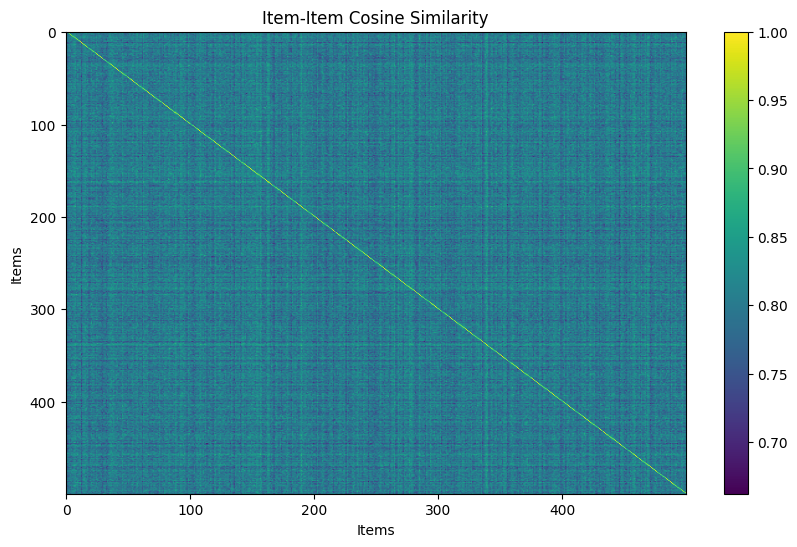

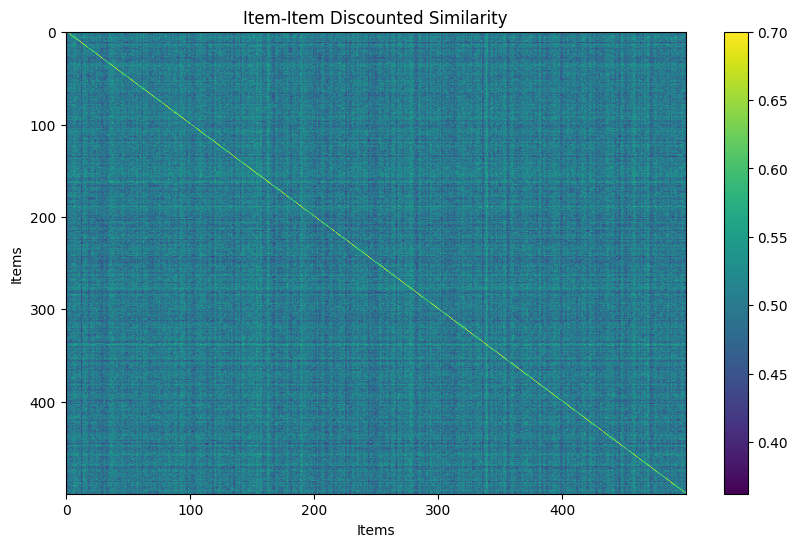

In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = 'user_item_matrix.csv'  # Path to the uploaded CSV file
data = pd.read_csv(file_path)

data.set_index(data.columns[0], inplace=True)  # Set the first column as the index (item names)
data = data.astype(float)  # Convert to float for handling missing ratings (NaN)

# Step 2: Define helper functions
def get_top_k_similar(similarity_matrix, k):
    """Get top-k most similar items for each item."""
    top_k_indices = np.argsort(-similarity_matrix, axis=1)[:, 1:k+1]  # Exclude self-similarity
    return top_k_indices

def predict_missing_ratings(data, similarity_matrix, top_k_indices):
    """Predict missing ratings based on top-k similar items."""
    predictions = data.copy()
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if np.isnan(data.iloc[i, j]):
                # Get top-k similar items
                similar_items = top_k_indices[i]
                similarities = similarity_matrix[i, similar_items]
                ratings = data.iloc[similar_items, j]
                # Weighted average prediction
                if not ratings.isnull().all():
                    predictions.iloc[i, j] = np.dot(similarities, ratings.fillna(0)) / np.sum(similarities)
    return predictions

def compute_discounted_similarity(similarity_matrix, threshold):
    """Compute discounted similarity based on a threshold."""
    discounted_similarity = np.where(similarity_matrix > threshold, similarity_matrix - threshold, 0)
    return discounted_similarity

# Step 2.1.1: Compute item-item Cosine similarity
item_similarity = cosine_similarity(data.fillna(0))

# Step 2.1.2: Determine the top 25% closest items to each target item
k_25_percent = int(0.25 * data.shape[0])
top_25_percent_indices = get_top_k_similar(item_similarity, k_25_percent)

# Step 2.1.3: Predict missing ratings for each target item using top 25% closest items
predictions_25_percent = predict_missing_ratings(data, item_similarity, top_25_percent_indices)

# Step 2.1.4: Compute discount factor (DF) and discounted similarity (DS)
threshold_b = 0.3  # Example threshold value
discounted_similarity = compute_discounted_similarity(item_similarity, threshold_b)

# Step 2.1.5: Determine the top 20% closest items using discounted similarity
k_20_percent = int(0.2 * data.shape[0])
top_20_percent_indices = get_top_k_similar(discounted_similarity, k_20_percent)

# Step 2.1.6: Predict missing ratings using top 20% closest items with discounted similarity
predictions_20_percent = predict_missing_ratings(data, discounted_similarity, top_20_percent_indices)

# Step 2.1.7: Compare results of top 25% and top 20% closest items
print("Comparison of top 25% and top 20% closest items:")
print("Top 25% Similarity Matrix:\n", item_similarity[top_25_percent_indices])
print("Top 20% Discounted Similarity Matrix:\n", discounted_similarity[top_20_percent_indices])

# Step 2.1.8: Compare prediction results
print("Comparison of Predictions:\n")
print("Predictions using top 25% closest items:\n", predictions_25_percent)
print("Predictions using top 20% closest items with discounted similarity:\n", predictions_20_percent)

# Visualize the similarities for analysis
plt.figure(figsize=(10, 6))
plt.imshow(item_similarity, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Item-Item Cosine Similarity')
plt.xlabel('Items')
plt.ylabel('Items')
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(discounted_similarity, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Item-Item Discounted Similarity')
plt.xlabel('Items')
plt.ylabel('Items')
plt.show()


# **Case Study 2.2**

<ipython-input-6-6779618c295c>:50: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  discount_factor = sim_matrix.applymap(lambda x: 1 / (1 + np.exp(-(x - threshold))))


Comparison of Results:
{'Total Predictions (Method 1)': 2470, 'Total Predictions (Method 2)': 2470, 'Matching Predictions': 0}


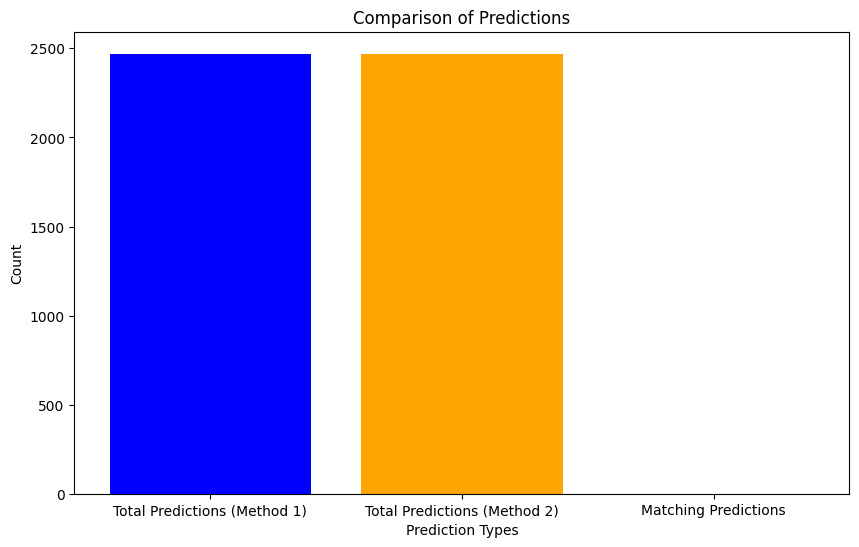

In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = 'user_item_matrix.csv'  # Update this to the correct path
data = pd.read_csv(file_path)

# Ensure dataset is in the expected format (first column: items, rest: users)
data.set_index(data.columns[0], inplace=True)  # Set the first column as the index (item names)
data = data.astype(float)  # Convert to float for handling missing ratings (NaN)

# Step 2: Mean-center the ratings for bias adjustment
data_mean_centered = data.sub(data.mean(axis=1), axis=0)
data_mean_centered.fillna(0, inplace=True)  # Replace NaN with 0 for similarity calculations

# Step 3: Compute item-item similarity using Cosine similarity
cosine_sim = cosine_similarity(data_mean_centered)
similarity_matrix = pd.DataFrame(cosine_sim, index=data.index, columns=data.index)

# Step 4: Identify top 20% closest items to each target item
def get_top_percent_similarities(sim_matrix, percent=20):
    top_k = int(len(sim_matrix.columns) * (percent / 100))
    top_items = {}
    for item in sim_matrix.index:
        sorted_items = sim_matrix.loc[item].sort_values(ascending=False)
        top_items[item] = sorted_items.iloc[1:top_k + 1].index.tolist()  # Exclude self-similarity
    return top_items

top_20_percent_items = get_top_percent_similarities(similarity_matrix, percent=20)

# Step 5: Predict missing ratings using top 20% items
def predict_ratings(data, top_items, sim_matrix):
    predictions = pd.DataFrame(index=data.index, columns=data.columns)
    for item, similar_items in top_items.items():
        for user in data.columns:
            if pd.isna(data.loc[item, user]):  # Predict only for missing ratings
                numerator = sum(sim_matrix.loc[item, sim_item] * data.loc[sim_item, user]
                                for sim_item in similar_items if not pd.isna(data.loc[sim_item, user]))
                denominator = sum(abs(sim_matrix.loc[item, sim_item])
                                  for sim_item in similar_items if not pd.isna(data.loc[sim_item, user]))
                predictions.loc[item, user] = numerator / denominator if denominator != 0 else np.nan
    return predictions

predictions_top_20 = predict_ratings(data, top_20_percent_items, similarity_matrix)

# Step 6: Compute Discount Factor (DF) and Discounted Similarity (DS)
def compute_discount_factor(sim_matrix, threshold):
    discount_factor = sim_matrix.applymap(lambda x: 1 / (1 + np.exp(-(x - threshold))))
    return discount_factor

def compute_discounted_similarity(sim_matrix, discount_factor):
    discounted_similarity = sim_matrix * discount_factor
    return discounted_similarity

df_matrix = compute_discount_factor(similarity_matrix, threshold=3)
discounted_similarity_matrix = compute_discounted_similarity(similarity_matrix, df_matrix)

# Step 7: Identify top 20% closest items using discounted similarity
top_20_percent_discounted_items = get_top_percent_similarities(discounted_similarity_matrix, percent=20)

# Step 8: Predict missing ratings using discounted similarity
discounted_predictions = predict_ratings(data, top_20_percent_discounted_items, discounted_similarity_matrix)

# Step 9: Compare results and comment
def compare_results(predictions_1, predictions_2):
    comparison = {
        'Total Predictions (Method 1)': predictions_1.notna().sum().sum(),
        'Total Predictions (Method 2)': predictions_2.notna().sum().sum(),
        'Matching Predictions': (predictions_1 == predictions_2).sum().sum()
    }
    return comparison

comparison_1 = compare_results(predictions_top_20, discounted_predictions)
print("Comparison of Results:")
print(comparison_1)

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(comparison_1.keys(), comparison_1.values(), color=['blue', 'orange', 'green'])
plt.xlabel("Prediction Types")
plt.ylabel("Count")
plt.title("Comparison of Predictions")
plt.show()


# **Case Study 2.3**

In [20]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
data = pd.read_csv("user_item_matrix.csv", index_col="title")

# Handle missing values (e.g., impute with mean)
data = data.fillna(data.mean(axis=0))

# Calculate PCC similarity matrix
similarity_matrix = cosine_similarity(data.T)

# Function to get top N similar items
def get_top_n_similar_items(similarity_matrix, item_index, N):
    similar_items = similarity_matrix[item_index].argsort()[:-N-1:-1]
    return similar_items

# Function to predict ratings without DF
def predict_rating_without_df(similarity_matrix, ratings, item_index, user_index):
    similar_items = get_top_n_similar_items(similarity_matrix, item_index, 20)
    numerator = sum([ratings.iloc[similar_item, user_index] * similarity_matrix[item_index, similar_item] for similar_item in similar_items])
    denominator = sum([abs(similarity_matrix[item_index, similar_item]) for similar_item in similar_items])
    return numerator / denominator

# Function to predict ratings with DF
def predict_rating_with_df(similarity_matrix, ratings, item_index, user_index, B):
    similar_items = get_top_n_similar_items(similarity_matrix, item_index, 20)
    numerator = sum([ratings.iloc[similar_item, user_index] * similarity_matrix[item_index, similar_item] * (1 / (1 + abs(ratings.iloc[item_index].mean() - ratings.iloc[similar_item].mean()) / B)) for similar_item in similar_items])
    denominator = sum([abs(similarity_matrix[item_index, similar_item]) * (1 / (1 + abs(ratings.iloc[item_index].mean() - ratings.iloc[similar_item].mean()) / B)) for similar_item in similar_items])
    return numerator / denominator

# Example usage:
item_index = 0  # Index of the target item
user_index = 2  # Index of the user for prediction
B = 3.0  # Threshold for discount factor

prediction_without_df = predict_rating_without_df(similarity_matrix, data, item_index, user_index)
prediction_with_df = predict_rating_with_df(similarity_matrix, data, item_index, user_index, B)

print("Prediction without DF:", prediction_without_df)
print("Prediction with DF:", prediction_with_df)


Prediction without DF: 3.2891571595653235
Prediction with DF: 3.2865331614289683
